## EXERCICE 9 : Analyse ANOVA

Nous allons dans cet exercice effectuer en détail une analyse ANOVA sur deux jeux de données classiques afin de bien comprendre son fonctionnement.

*Inspire de  https://www.marsja.se/four-ways-to-conduct-one-way-anovas-using-python/*


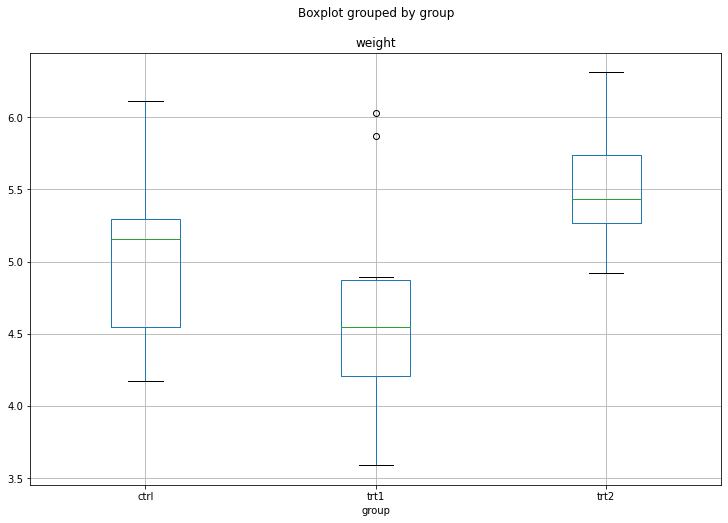

In [1]:

#1) INITIALISATION

#1.1) Importe les modules matplotlib (pour la visualisation de graphes) et pandas (pour la manipulation de donnees)
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

#1.2) charge les donnees
data = pd.read_csv("PlantGrowth.csv")
 
#1.3) represente un resume des données (necessite d'avoir appele matplotlib)
data.boxplot('weight', by='group', figsize=(12, 8))
plt.show()


### <span style="color:blue">QUESTIONS 1</span> :

- Que signifient les box-plots (ou boites à moustache) ? Vous pouvez taper 'data.boxplot?' pour des informations élémentaires.
- Les groupes vous semblent-il distribués de manière similaire ?
- Les variabilités intra-groupe vous semblent-t-elles similaires ?

**Remarque :** On pourra constater que les observations sont dans trois groupes de tailles égales. On note $n$ le nombre d'observations dans chaque sous-groupe et $N$ le nombre d'observations total.

### <span style="color:blue">REPONSES 1</span> :
- ...
- ...
- ...

In [2]:
#2) STATISTIQUE DE FISHER

 
grps = pd.unique(data.group.values)
d_data = {grp:data['weight'][data.group == grp] for grp in grps}
 
k = len(grps)  # nombre de groupes
N = len(data.values)  # nombre d'observations
n = data.groupby('group').size()[0] #nombre d'observations dans chaque groupe (on remarque que tous les groupes on la meme taille)

#calcule la variabilite due aux interactions entre groupes (Sum of Squares Between)
SSbetween = (sum(data.groupby('group').sum()['weight']**2)/n)- (data['weight'].sum()**2)/N

#calcule la variabilite due aux differences entre les observations (Sum of Squares Within)
sum_y_squared = sum([value**2 for value in data['weight'].values])
SSwithin = sum_y_squared - sum(data.groupby('group').sum()['weight']**2)/n

#calcule la variabilite totale (Sum of Squares Total)
SStotal = sum_y_squared - (data['weight'].sum()**2)/N

#defini les degres de liberte
DFbetween = k - 1
DFwithin = N - k
DFtotal = N - 1

#calcule la statistique de Fisher
MSbetween = SSbetween/DFbetween
MSwithin = SSwithin/DFwithin

F = MSbetween/MSwithin


p = stats.f.sf(F, DFbetween, DFwithin)

print(p)

0.015909958325623124


### <span style="color:blue">QUESTION 2</span> :


Faire le lien avec le cours, puis chercher ce que fait la fonction *stats.f.sf* afin d'expliquer ce que signifie *p*. Qu'en déduisez vous sur l'égalité ou l'inégalité des moyennes ? 

### <span style="color:blue">REPONSE 2</span> :

p est la probabilité de rejeter l'inégalité des moyennes. p étant très petit : les moyennes sont vraissembablement inégales.


### <span style="color:blue">QUESTION 3</span> :

Adaptez ce code pour étudier la colonne 'f2' des données IRIS de 'DataIris.csv'. Que déduisez vous du résultat sur les valeurs de la colonne (variable) dans les trois groupes d'IRIS considérés ?

### <span style="color:blue">REPONSE 3</span> :

La probabilité de rejeter l'inégalité des moyennes étant très petites : il est donc vraissemblable que les moyennes soient inégales.


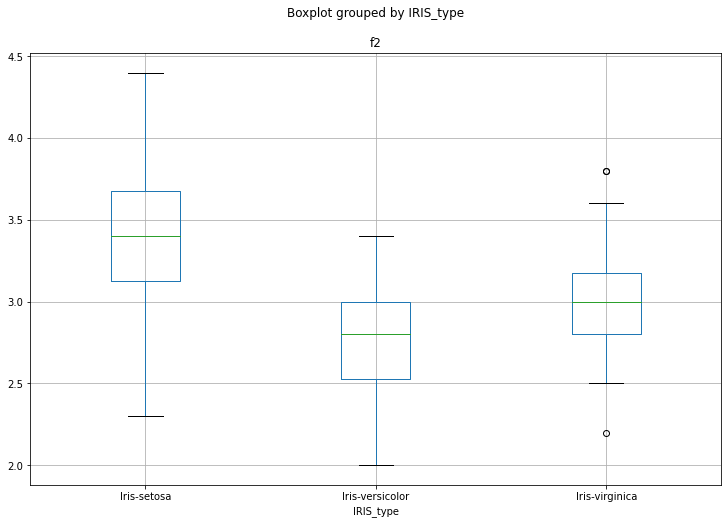

1.3279165184550504e-16


In [5]:

data = pd.read_csv("DataIris.csv")
 
data.boxplot('f2', by='IRIS_type', figsize=(12, 8))
plt.show()


grps = pd.unique(data['IRIS_type'])
d_data = {grp:data['f2'][data['IRIS_type'] == grp] for grp in grps}
 
k = len(grps)  # nombre de groupes
N = len(data.values)  # nombre d'observations
n = data.groupby('IRIS_type').size()[0] #nombre d'observations dans chaque groupe (on remarque que tous les groupes on la meme taille)

#calcule la variabilite due aux interactions entre groupes (Sum of Squares Between)
SSbetween = (sum(data.groupby('IRIS_type').sum()['f2']**2)/n)- (data['f2'].sum()**2)/N

#calcule la variabilite due aux differences entre les observations (Sum of Squares Within)
sum_y_squared = sum([value**2 for value in data['f2'].values])
SSwithin = sum_y_squared - sum(data.groupby('IRIS_type').sum()['f2']**2)/n

#calcule la variabilite totale (Sum of Squares Total)
SStotal = sum_y_squared - (data['f2'].sum()**2)/N

#defini les degres de liberte
DFbetween = k - 1
DFwithin = N - k
DFtotal = N - 1

#calcule la statistique de Fisher
MSbetween = SSbetween/DFbetween
MSwithin = SSwithin/DFwithin

F = MSbetween/MSwithin


p = stats.f.sf(F, DFbetween, DFwithin)

print(p)



### <span style="color:blue">QUESTION 4</span> :

Est-ce qu'un test non-paramétrique de kruskal wallis conduit à la même conclusion ?

On pourra utiliser la fonction scipy.stats.kruskal

### <span style="color:blue">REPONSE 4</span> :

In [8]:

from scipy.stats import kruskal

list_groups = []
for grp in grps:
    list_groups.append(data['f2'][data['IRIS_type'] == grp])
    
kruskal(list_groups[0],list_groups[1],list_groups[2])

KruskalResult(statistic=62.49463010053111, pvalue=2.6882119006774528e-14)

In [10]:
# La p-value étant très faible : il est vraissemblable que les médianes soient différentes.